In [5]:
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from glob import glob
import os
from PIL import Image
import cv2
import numpy as np
from tqdm import tqdm

In [6]:
df = pd.read_csv('/home/wangqy/gardnet/train_full.csv')
df

,challenge_id,class,referable,gradable,x1,y1,x2,y2
0,TRAIN000000,NRG,0,0,-1.0,-1.0,-1.0,-1.0
1,TRAIN000001,NRG,0,0,158.0,60.0,233.0,138.0
2,TRAIN000002,NRG,0,0,-1.0,-1.0,-1.0,-1.0
3,TRAIN000004,NRG,0,0,118.0,76.0,194.0,162.0
4,TRAIN000006,NRG,0,0,134.0,67.0,222.0,156.0
...,...,...,...,...,...,...,...,...
91437,TRAIN101437,NRG,0,0,22.0,82.0,66.0,133.0
91438,TRAIN101438,NRG,0,0,106.0,84.0,188.0,165.0
91439,TRAIN101439,NRG,0,0,119.0,83.0,194.0,156.0
91440,TRAIN101440,NRG,0,0,33.0,61.0,109.0,144.0


In [7]:
# Select images with bounding box only
df_wbox = df[df['x1'] != -1]
df_wbox

,challenge_id,class,referable,gradable,x1,y1,x2,y2
1,TRAIN000001,NRG,0,0,158.0,60.0,233.0,138.0
3,TRAIN000004,NRG,0,0,118.0,76.0,194.0,162.0
4,TRAIN000006,NRG,0,0,134.0,67.0,222.0,156.0
5,TRAIN000007,NRG,0,0,153.0,61.0,223.0,147.0
6,TRAIN000008,NRG,0,0,131.0,93.0,195.0,163.0
...,...,...,...,...,...,...,...,...
91437,TRAIN101437,NRG,0,0,22.0,82.0,66.0,133.0
91438,TRAIN101438,NRG,0,0,106.0,84.0,188.0,165.0
91439,TRAIN101439,NRG,0,0,119.0,83.0,194.0,156.0
91440,TRAIN101440,NRG,0,0,33.0,61.0,109.0,144.0


In [8]:
import threading
for i,img in enumerate(tqdm(df_wbox['challenge_id'])):
 
    x1 = int(df_wbox.iloc[i]['x1'])
    x2 = int(df_wbox.iloc[i]['x2'])
    y1 = int(df_wbox.iloc[i]['y1'])
    y2 = int(df_wbox.iloc[i]['y2'])
    
    # Path to uncropped original images
    path = '/home/wangqy/gardnet/dataset/[0-5]/*.jpg'
    path = glob(os.path.join(path))[-1]
    
    im = plt.imread(path) 
    w,h,_ = im.shape
    
    transform = transforms.Compose([
      transforms.ToTensor(),                            
      transforms.Resize((512, 512))
    ])
    
    fy = h/256
    fx = w/256
    cropped_im = im[int(y1*fx):int(y2*fx),int(x1*fy):int(x2*fy)]

    try:
        cropped_im = transform(cropped_im)
    except Exception as e:
        print(e)
        print(f"h = {h}, w = {w}")
        print(f"fx = {fx}, fy = {fy}, x1,x2,y1,y2 = {x1,x2,y1,y2}")
        print(f'Img id = {img}')
        break
    
    # new_path is the path to save the cropped images
    new_path = '/home/wangqy/gardnet/dataset/cropped_images/'
    os.makedirs(new_path.replace(os.path.basename(new_path),''),exist_ok=True)
    cropped_im = (cropped_im.moveaxis(0, -1).numpy() * 255).astype('uint8')
    assert cv2.imwrite(f"{new_path}{img}.jpg", cv2.cvtColor(cropped_im, cv2.COLOR_RGB2BGR))


100%|██████████| 73937/73937 [2:27:57<00:00,  8.33it/s]  


## Visualize the process on a single sample image

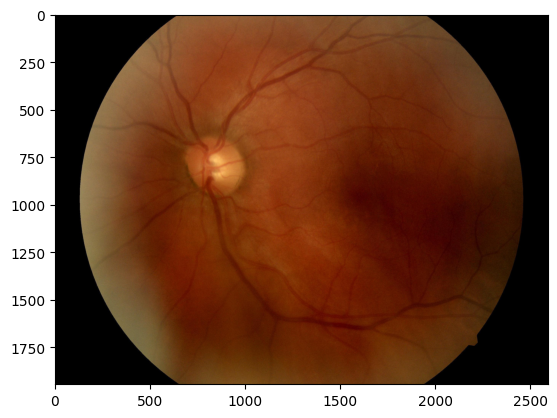

In [14]:
import matplotlib.pyplot as plt
im = plt.imread('/home/wangqy/gardnet/dataset/4/TRAIN073574.jpg')
plt.imshow(im)

In [15]:

transform = transforms.Compose([
  transforms.ToTensor(),                            
  transforms.Resize((512, 512))
])
im = transform(im)
im.shape

torch.Size([3, 512, 512])

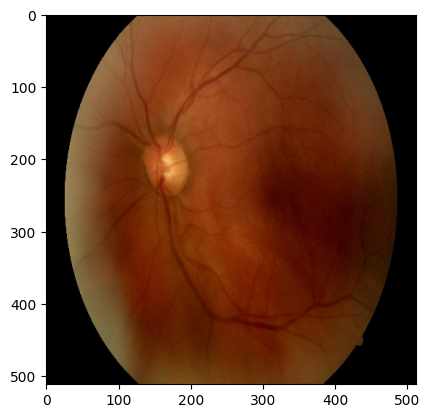

In [16]:
im = im.moveaxis(0,-1)
plt.imshow(im)

ValueError: zero-size array to reduction operation minimum which has no identity

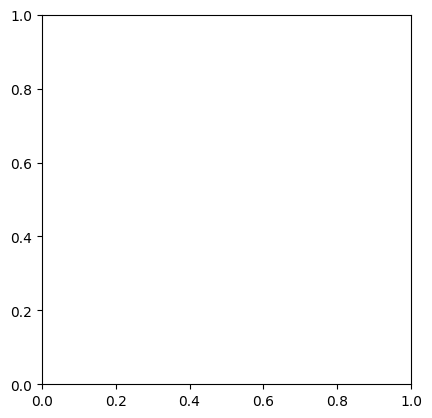

In [17]:
fy = int(3888/256)
fx = int(2592/256)
plt.imshow(im[y1*fx:y2*fx,x1*fy:x2*fy])